In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
import os
print(os.getcwd())

d:\10academy\week0\kaim_week0_challenge\notebooks


In [8]:
# Define a function to load and preprocess data
def load_and_preprocess_data(file_path):
    # Load the data
    df = pd.read_csv(file_path, parse_dates=['Timestamp'])
    
    # Set Timestamp as the index
    df.set_index('Timestamp', inplace=True)
    
    return df

In [ ]:
# Load each dataset
benin_df = load_and_preprocess_data('../data/benin-malanville.csv')
sl_df = load_and_preprocess_data('../data/sierraleone-bumbuna.csv')
togo_df = load_and_preprocess_data('../data/togo-dapaong_qc.csv')

In [10]:
# Display basic information about each DataFrame
print("Benin Malanville Data:")
print(benin_df.info())
print("\nSierra Leone Bumbuna Data:")
print(sl_df.info())
print("\nTogo Dapaong QC Data:")
print(togo_df.info())

Benin Malanville Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          52

In [11]:
#Summary Statistics & Missing-Value Report
# Function to generate summary statistics and missing value report
def summarize_data(df, country_name):
    print(f"\nSummary Statistics for {country_name}:")
    print(df.describe())
    
    print(f"\nMissing Values for {country_name}:")
    missing_values = df.isna().sum()
    print(missing_values)
    
    # Identify columns with >5% missing values
    total_rows = len(df)
    high_missing_cols = missing_values[missing_values / total_rows > 0.05]
    if not high_missing_cols.empty:
        print(f"\nColumns with >5% missing values in {country_name}:")
        print(high_missing_cols)

# Apply the function to each dataset
summarize_data(benin_df, "Benin Malanville")
summarize_data(sl_df, "Sierra Leone Bumbuna")
summarize_data(togo_df, "Togo Dapaong QC")


Summary Statistics for Benin Malanville:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.0

In [ ]:
# 1. Detecting Outliers Using Z-Scores
from scipy import stats

# Define columns of interest
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Function to detect and handle outliers
def detect_and_clean_outliers(df):
    z_scores = np.abs(stats.zscore(df[cols_to_check]))
    outliers = (z_scores > 3).any(axis=1)
    
    print(f"Number of outlier rows detected: {outliers.sum()}")
    
    # Option 1: Drop outlier rows
    df_cleaned = df[~outliers].copy()
    
    return df_cleaned

# Clean each dataset
benin_clean = detect_and_clean_outliers(benin_df)
sierra_clean = detect_and_clean_outliers(sl_df)
togo_clean = detect_and_clean_outliers(togo_df)

print("\nBenin Cleaned Shape:", benin_clean.shape)
print("Sierra Leone Cleaned Shape:", sierra_clean.shape)
print("Togo Cleaned Shape:", togo_clean.shape)

Number of outlier rows detected: 7740
Number of outlier rows detected: 16292
Number of outlier rows detected: 9251

Benin Cleaned Shape: (517860, 18)
Sierra Leone Cleaned Shape: (509308, 18)
Togo Cleaned Shape: (516349, 18)


In [13]:
 #2. Handling Missing Values
def check_missing_values(df, country):
    missing_percent = (df.isna().sum() / len(df)) * 100
    print(f"\nMissing Values in {country} (%):")
    print(missing_percent[missing_percent > 0])

check_missing_values(benin_clean, "Benin Malanville")
check_missing_values(sierra_clean, "Sierra Leone Bumbuna")
check_missing_values(togo_clean, "Togo Dapaong QC")


Missing Values in Benin Malanville (%):
Comments    100.0
dtype: float64

Missing Values in Sierra Leone Bumbuna (%):
Comments    100.0
dtype: float64

Missing Values in Togo Dapaong QC (%):
Comments    100.0
dtype: float64


In [14]:
# Impute missing values with median
benin_clean.fillna(benin_clean.median(numeric_only=True), inplace=True)
sierra_clean.fillna(sierra_clean.median(numeric_only=True), inplace=True)
togo_clean.fillna(togo_clean.median(numeric_only=True), inplace=True)

In [15]:
#3. Time Series Patterns During Day vs Night
def filter_daytime_data(df):
    return df[df['GHI'] > 0]

benin_day = filter_daytime_data(benin_clean)
sierra_day = filter_daytime_data(sierra_clean)
togo_day = filter_daytime_data(togo_clean)

print("\nBenin Daytime Rows:", len(benin_day))
print("Sierra Leone Daytime Rows:", len(sierra_day))
print("Togo Daytime Rows:", len(togo_day))


Benin Daytime Rows: 260549
Sierra Leone Daytime Rows: 249295
Togo Daytime Rows: 259844


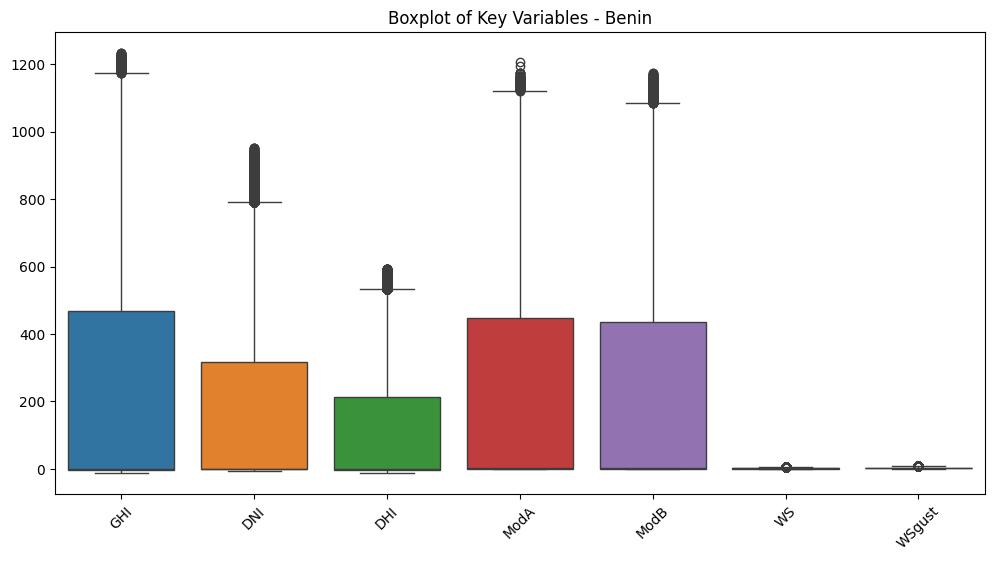

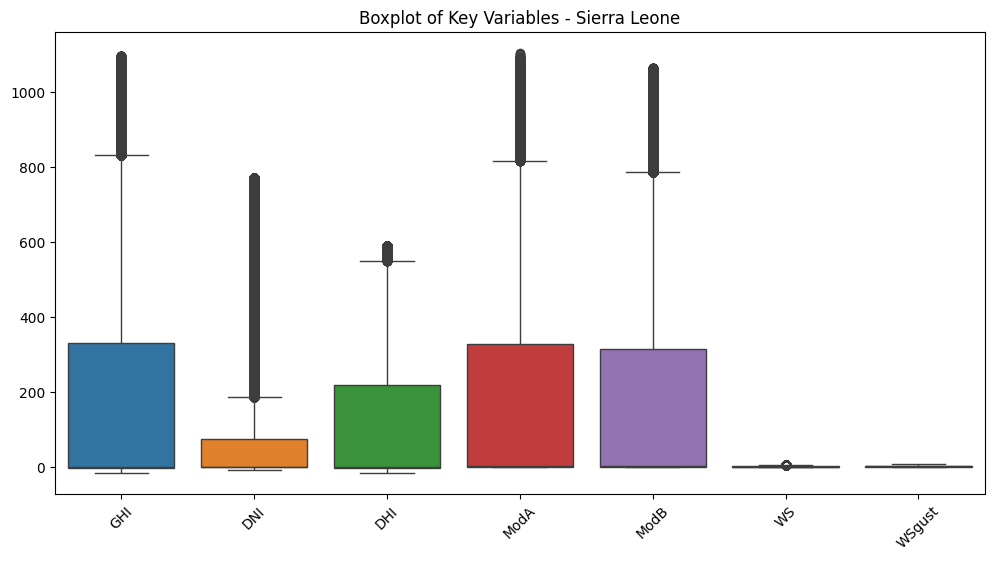

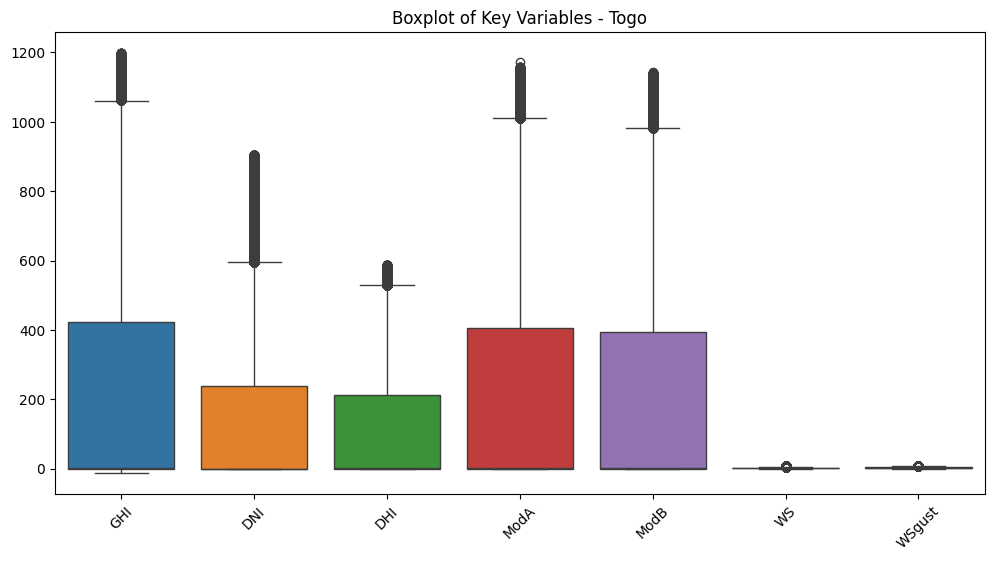

In [16]:
# Statistical Understanding: Use of Boxplots & IQR
def plot_boxplots(df, country):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[cols_to_check])
    plt.title(f'Boxplot of Key Variables - {country}')
    plt.xticks(rotation=45)
    plt.show()

plot_boxplots(benin_clean, "Benin")
plot_boxplots(sierra_clean, "Sierra Leone")
plot_boxplots(togo_clean, "Togo")

In [22]:
benin_clean.to_csv('../data/benin_clean.csv', index=True)
sierra_clean.to_csv('../data/sierra_leone_clean.csv', index=True)
togo_clean.to_csv('../data/togo_clean.csv', index=True)

Next Steps
Now that the data is cleaned, we'll move on to:
1. Time series plots of GHI, DNI, DHI over time
2. Wind Rose (directional wind patterns)
3. Sensor comparison before/after cleaning
4. Correlation heatmaps
5. Histograms and bubble charts for visual insights

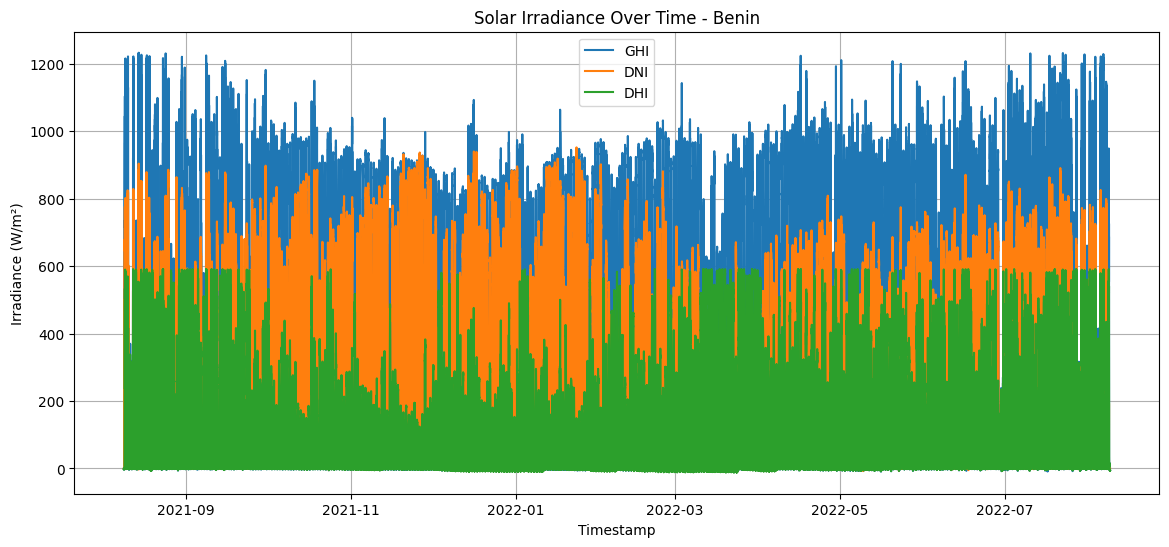

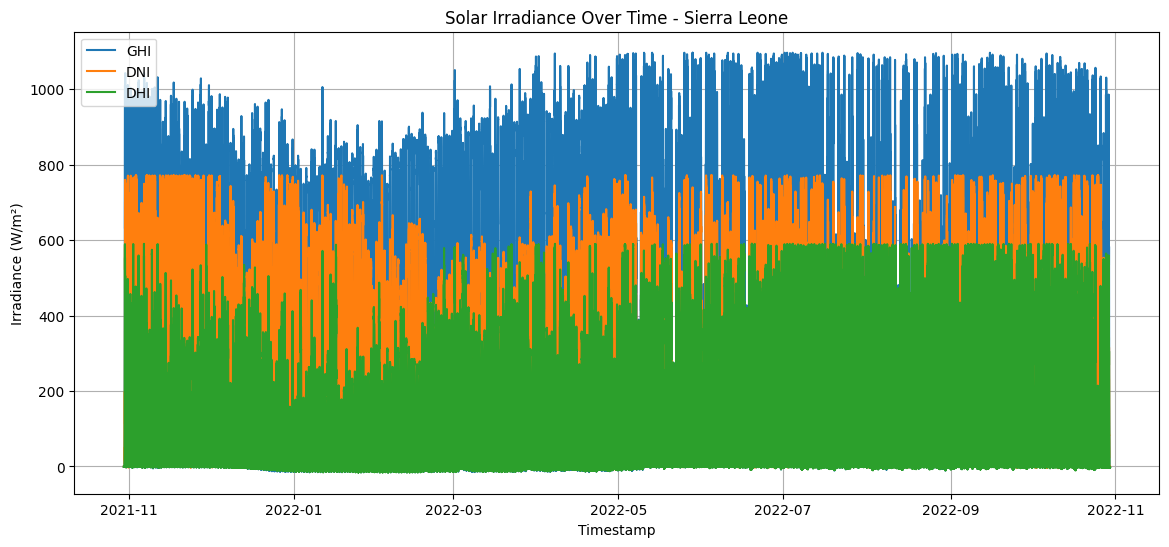

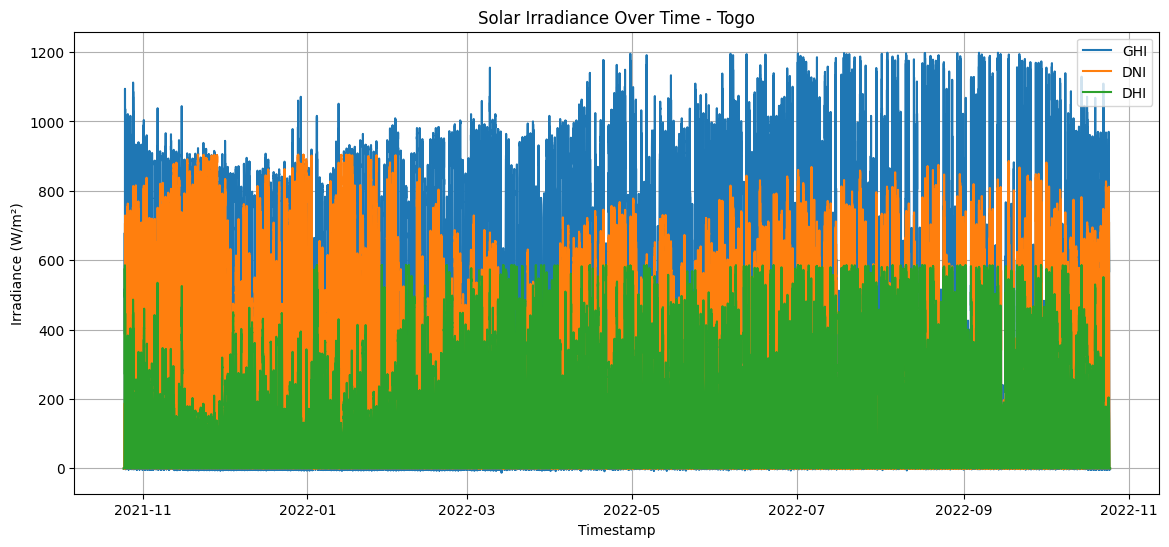

In [23]:
#1. Time Series Analysis
def plot_time_series(df, country):
    plt.figure(figsize=(14, 6))
    plt.plot(df['GHI'], label='GHI')
    plt.plot(df['DNI'], label='DNI')
    plt.plot(df['DHI'], label='DHI')
    plt.title(f'Solar Irradiance Over Time - {country}')
    plt.xlabel('Timestamp')
    plt.ylabel('Irradiance (W/m²)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_time_series(benin_clean, 'Benin')
plot_time_series(sierra_clean, 'Sierra Leone')
plot_time_series(togo_clean, 'Togo')

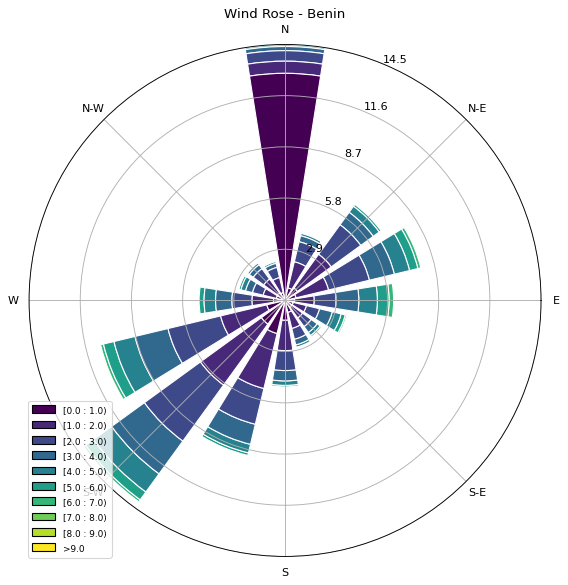

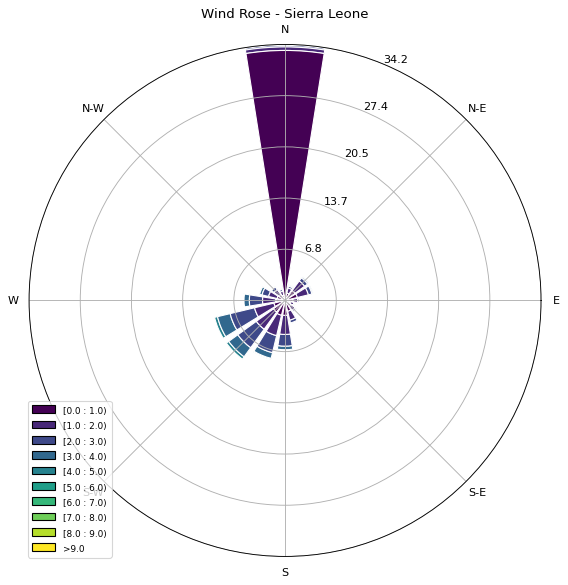

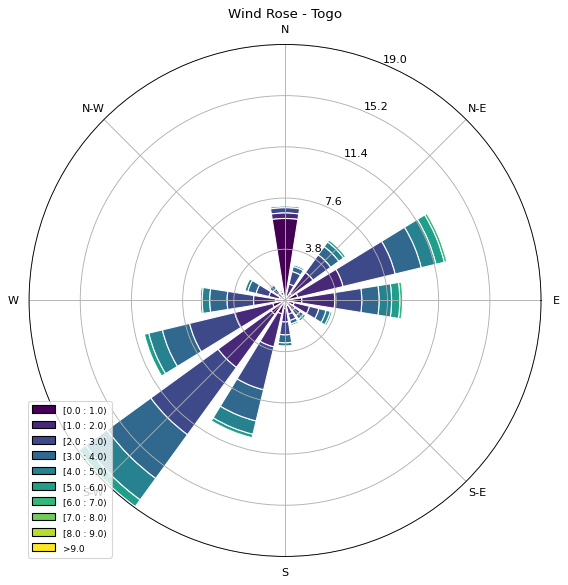

In [ ]:
#2. Wind Rose Diagram
from windrose import WindroseAxes

def plot_wind_rose(df, country):
    ax = WindroseAxes.from_ax()
    ax.bar(df['WD'], df['WS'], bins=np.arange(0, 10, 1), normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    ax.set_title(f'Wind Rose - {country}')
    plt.show()

plot_wind_rose(benin_clean, 'Benin')
plot_wind_rose(sierra_clean, 'Sierra Leone')
plot_wind_rose(togo_clean, 'Togo')

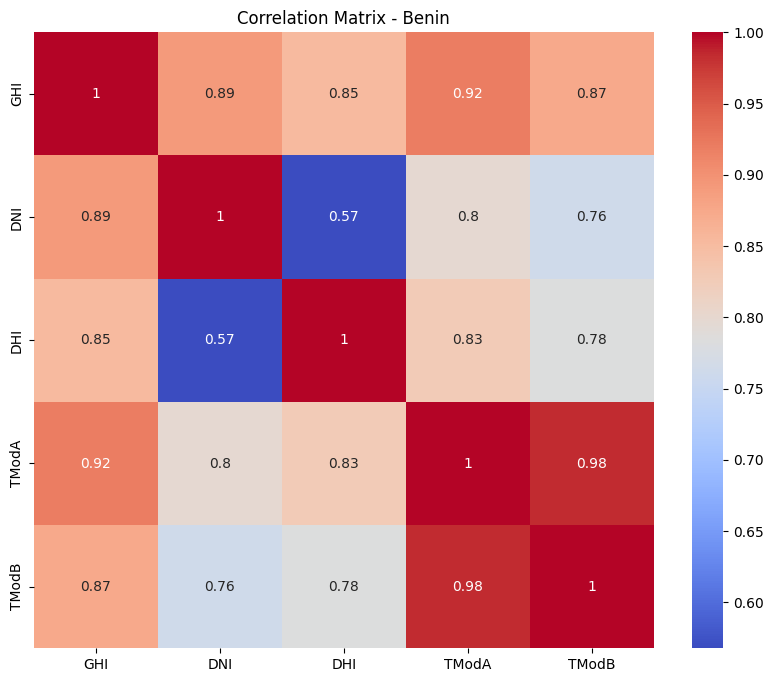

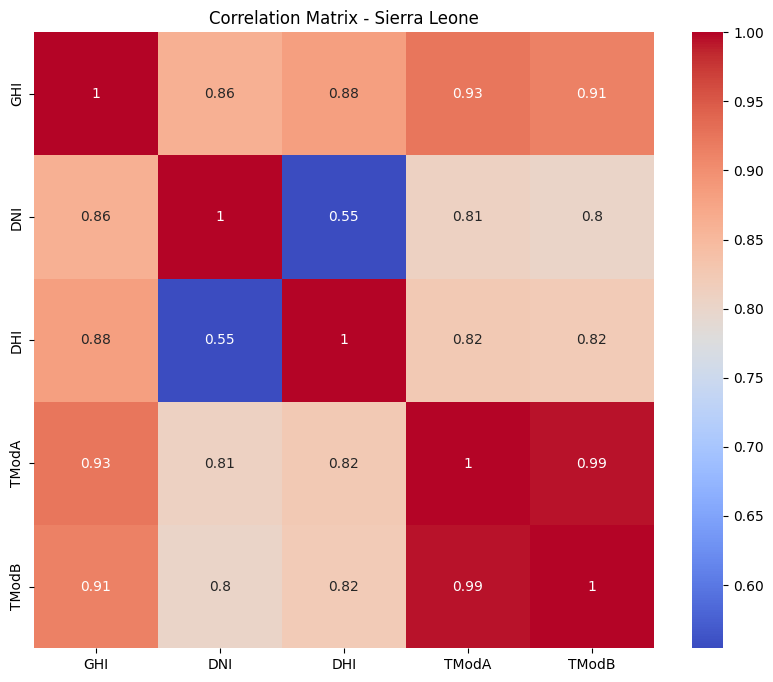

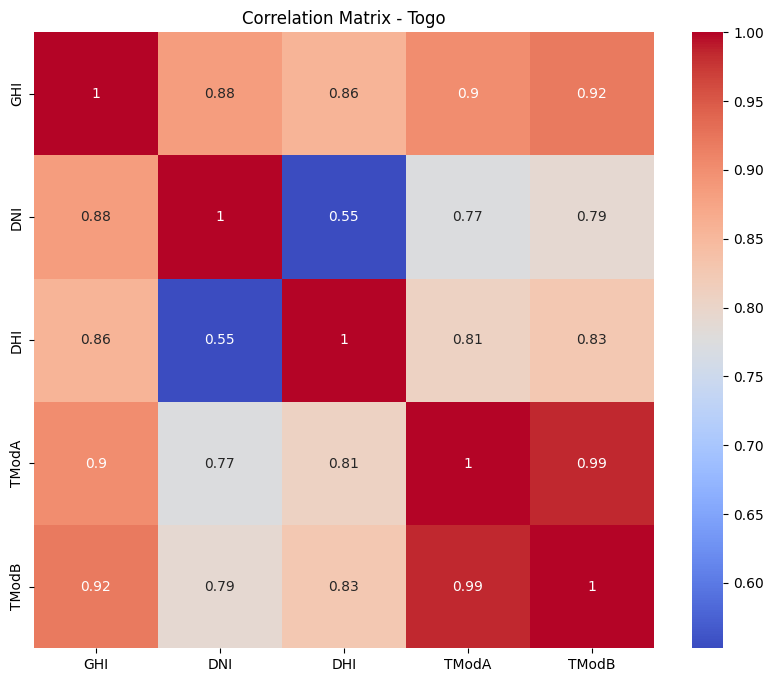

In [20]:
#3. Correlation Heatmap
def plot_correlation(df, country):
    plt.figure(figsize=(10, 8))
    corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix - {country}')
    plt.show()

plot_correlation(benin_clean, 'Benin')
plot_correlation(sierra_clean, 'Sierra Leone')
plot_correlation(togo_clean, 'Togo')

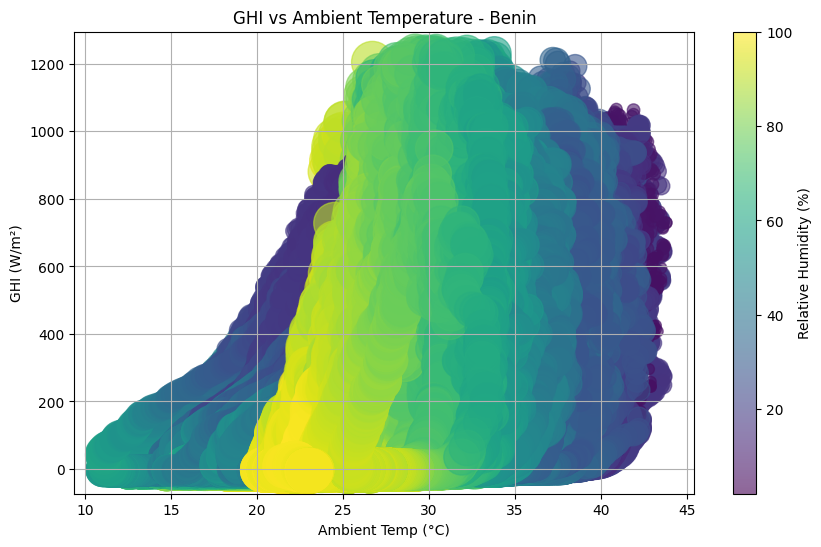

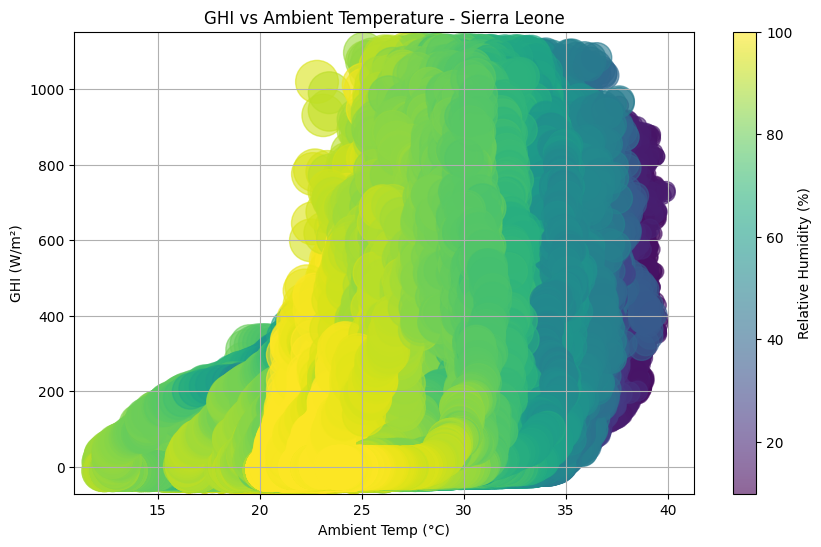

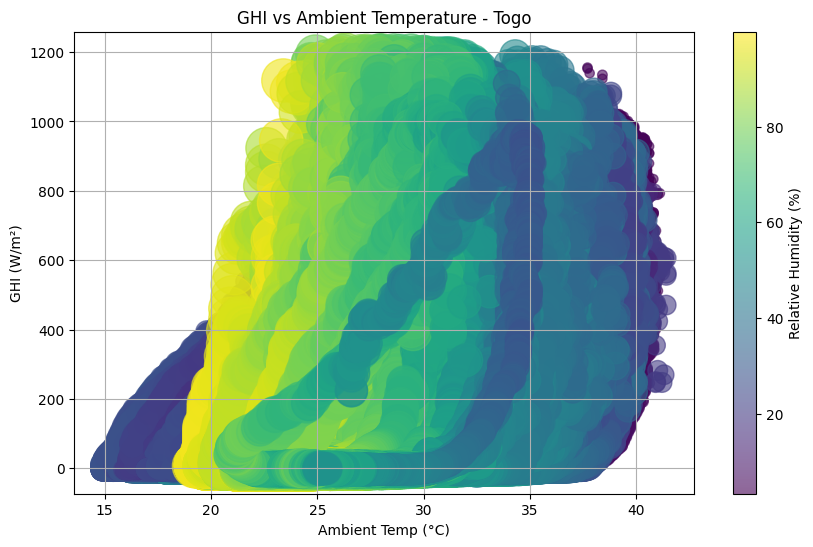

In [21]:
#4. Bubble Chart: GHI vs Tamb with RH
def plot_bubble_chart(df, country):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['Tamb'], df['GHI'], c=df['RH'], s=df['RH']*10, alpha=0.6, cmap='viridis')
    plt.colorbar(scatter, label='Relative Humidity (%)')
    plt.title(f'GHI vs Ambient Temperature - {country}')
    plt.xlabel('Ambient Temp (°C)')
    plt.ylabel('GHI (W/m²)')
    plt.grid(True)
    plt.show()

plot_bubble_chart(benin_clean, 'Benin')
plot_bubble_chart(sierra_clean, 'Sierra Leone')
plot_bubble_chart(togo_clean, 'Togo')

Task 3